In [2]:
import pandas as pd

flights = pd.read_csv('data/flights.csv')
flights.head()

C:\Users\roi_y\AppData\Local\Temp\ipykernel_21152\1707389814.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('data/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**1**. Find how many flights departed from LAX airport in July 2015.

In [2]:
len(flights[(flights['ORIGIN_AIRPORT'] == 'LAX') & (flights['YEAR'] == 2015) & (flights['MONTH'] == 7)])

19371

**2**. Find the number of the flight that had the longest arrival delay.

In [3]:
flights.loc[flights['ARRIVAL_DELAY'].idxmax(), 'FLIGHT_NUMBER']

1322

**3**. Find the airport with the highest number of arriving flights.

In [4]:
flights.groupby('DESTINATION_AIRPORT').size().idxmax()

'ATL'

**4**. Find the day of week that had the highest number of flight cancellations.

In [5]:
flights.groupby('DAY_OF_WEEK')['CANCELLED'].sum().idxmax()

1

**5**. Create a bar plot showing the number of flights for each airline.

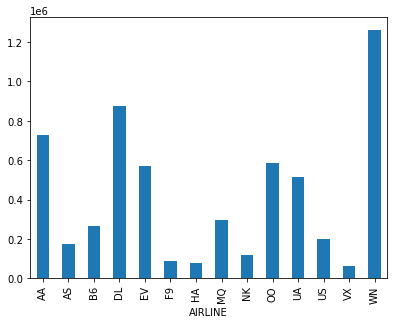

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6.4, 4.8))

flights.groupby('AIRLINE').size().plot.bar()

plt.savefig('figures/flights_per_airline.pdf')

**6**. Find the mean arrival delay for each airline.

In [7]:
flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean()

AIRLINE
AA     3.451372
AS    -0.976563
B6     6.677861
DL     0.186754
EV     6.585379
F9    12.504706
HA     2.023093
MQ     6.457873
NK    14.471800
OO     5.845652
UA     5.431594
US     3.706209
VX     4.737706
WN     4.374964
Name: ARRIVAL_DELAY, dtype: float64

**7**. Find the airlines that had more than 10,000 cancellations.

In [8]:
df = flights[flights['CANCELLED'] == 1].groupby('AIRLINE').size()
df[df > 10000]

AIRLINE
AA    10919
EV    15231
MQ    15025
WN    16043
dtype: int64

**8**. Find the airlines that more than 2% of their flights have been cancelled. For each such airline, print its identifier
and the precentage of cancelled flights.

In [17]:
df = flights.groupby('AIRLINE')['CANCELLED'].mean()
df[df > 0.02]

AIRLINE
EV    0.026629
MQ    0.050996
US    0.020466
Name: CANCELLED, dtype: float64

**9**. Find the three top airlines with the highest number of cancelled or diverted flights.

In [18]:
flights[(flights['CANCELLED'] == 1) | (flights['DIVERTED'] == 1)]['AIRLINE'].value_counts()[:3]

WN    19452
EV    17225
MQ    15841
Name: AIRLINE, dtype: int64

**10**. Find the longest sequence of on-time flights for each airline (an on-time flight is a flight with less than 15 minutes arrival delay).

In [21]:
flights.groupby('AIRLINE')['ARRIVAL_DELAY'].agg(
    lambda delay: (delay >= 15).cumsum().value_counts().max() - 1)

AIRLINE
AA    156
AS    110
B6    170
DL    207
EV    128
F9    163
HA    213
MQ    117
NK     63
OO    121
UA    161
US    103
VX    116
WN    302
Name: ARRIVAL_DELAY, dtype: int64